**Importing Libraries**

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import cifar10
import PIL
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow import keras

**Train and Test Split**

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [ ]:
category = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(np.unique(y_train))

**Visualization**

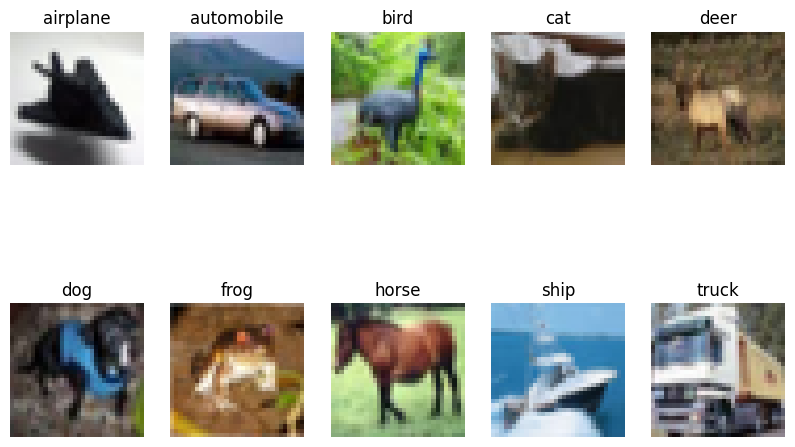

In [ ]:
plt.figure(figsize=(10, 10))
for i in range (num_classes):
  axs = plt.subplot(3, 5, i + 1)
  idx = np.where(y_train[:]==i)[0]
  x = X_train[idx,::]
  plt.imshow(x[0])
  axs.set_title(category[i])
  plt.axis("off")

In [ ]:
# normalize the data
X_train = X_train.astype('float32')
X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:

# one hot encode outputs
y_train = np_utils.to_categorical (y_train)
y_test = np_utils.to_categorical (y_test)

In [ ]:
#Defining the model
model = Sequential([
layers.Conv2D(32, (3,3), input_shape=X_train.shape[1:], padding='same', activation= 'relu'), layers. MaxPooling2D(pool_size=(2,2)),
layers.Conv2D(64, 3, padding='same', activation='relu'),
layers. MaxPooling2D(pool_size=(2,2)),
layers.Conv2D(64, 3, padding='same', activation='relu'),
layers. MaxPooling2D(pool_size=(2,2)),
layers. Dropout (0.2),
layers. Flatten(),
layers. Dense (256, activation='relu'),
layers.Dense (num_classes, activation='softmax')
])

In [ ]:
#Compiling the model using various metrics
model.compile(optimizer='adam',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 64)         0

In [ ]:
#Fitting the model with 10 epochs and 32 batches
seed = 21
np.random.seed(seed)
epochs=2
batch_size = 32
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size= batch_size)


Epoch 1/2
1563/1563 [==============================] - 77s 48ms/step - loss: 1.4225 - accuracy: 0.4845 - val_loss: 1.0586 - val_accuracy: 0.6271
Epoch 2/2
1563/1563 [==============================] - 81s 52ms/step - loss: 1.0199 - accuracy: 0.6383 - val_loss: 0.8794 - val_accuracy: 0.6921


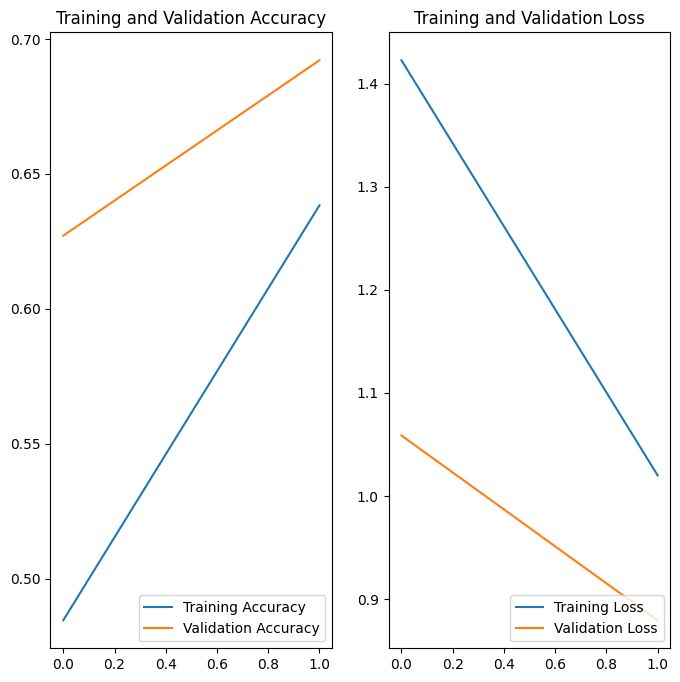

In [ ]:
#Plotting the loss and accuracy curve for Training and Validation
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='lower right')
plt.title('Training and Validation Loss')

plt. show()



In [ ]:
model = Sequential([
    layers.Conv2D(32, (3, 3), input_shape=X_train.shape[1:], padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),  # Changed e.2 to 0.2 (typo)
    layers.Conv2D(32, (3, 3), padding='same', activation='relu'),  # Removed additional single quotes
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),  # Removed additional single quotes
    layers.MaxPooling2D(),
    layers.Dropout(0.2),  # Changed e.2 to 0.2 (typo)
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),  # Changed e.3 to 0.3 (typo)
    layers.Dense(num_classes, activation='softmax')
])


In [ ]:
#8
optimizer = tf.keras.optimizers.legacy.RMSprop(learning_rate=0.0001, decay=1e-6)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 64)         

In [ ]:
#9
seed = 21
np.random.seed(seed)
epochs=2
batch_size = 32
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size= batch_size)

Epoch 1/2
1563/1563 [==============================] - 64s 41ms/step - loss: 1.9908 - accuracy: 0.2668 - val_loss: 1.7351 - val_accuracy: 0.3900
Epoch 2/2
1563/1563 [==============================] - 62s 39ms/step - loss: 1.6983 - accuracy: 0.3793 - val_loss: 1.5722 - val_accuracy: 0.4316


In [ ]:
#10
#Tuning the model with 4 Dropouts and 8 Activation layers expecting better training accuracy.
model3 = Sequential([
    layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3,3), padding='same', activation='relu'),
    layers. BatchNormalization(),
    layers. MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.3),

    layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers. MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.5),

    layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    layers. BatchNormalization(),
    layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Dropout(0.5),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers. BatchNormalization(),
    layers.Dropout (0.5),
    layers.Dense(num_classes, activation='softmax')
])
model3.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                      

In [ ]:
#11
model3.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])


**Training**

In [ ]:
epochs=2
batch_size = 32
history = model3.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size= batch_size)

Epoch 1/2
1563/1563 [==============================] - 327s 208ms/step - loss: 1.6643 - accuracy: 0.4245 - val_loss: 1.2177 - val_accuracy: 0.5642
Epoch 2/2
1563/1563 [==============================] - 324s 207ms/step - loss: 1.1460 - accuracy: 0.5931 - val_loss: 0.9508 - val_accuracy: 0.6609


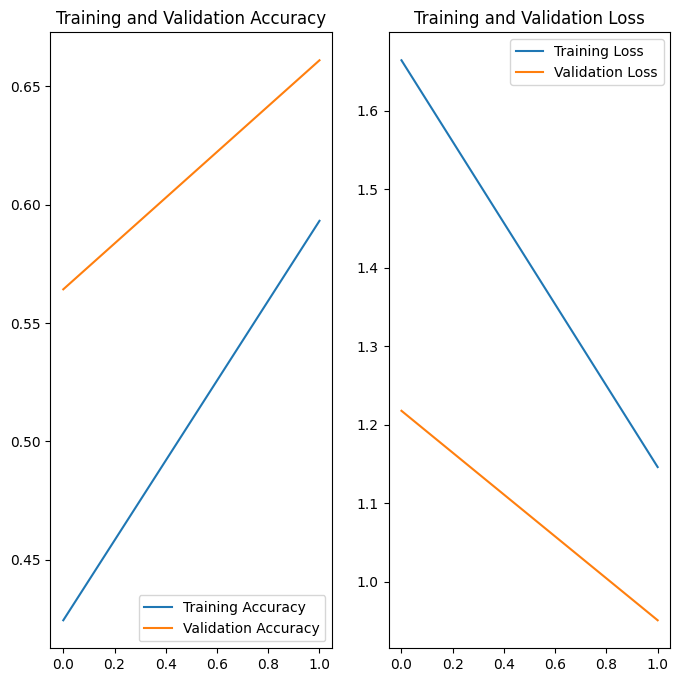

In [ ]:
#12
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)

plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')

plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')

plt.title('Training and Validation Loss')

plt.show()



In [ ]:
#13
predict = model3.predict(X_test)
print (predict)

# Converting the predictions into label index
predLabel = np.argmax(predict, axis=1)
print (predLabel)



313/313 [==============================] - 14s 44ms/step
[[1.9026014e-04 2.8798291e-03 1.7273151e-03 ... 3.3732923e-04
  3.7908506e-02 4.6036770e-03]
 [1.6183104e-02 8.4747933e-02 5.7312154e-05 ... 4.4233852e-06
  8.9627057e-01 2.7182088e-03]
 [3.3078473e-02 1.2722979e-01 1.0988251e-03 ... 8.2948143e-05
  8.2307357e-01 1.4857354e-02]
 ...
 [2.4712924e-04 7.6056116e-05 8.7786224e-03 ... 1.3024033e-02
  1.8795206e-04 4.5849031e-04]
 [4.7592107e-02 8.5507596e-01 2.9570157e-02 ... 2.4831309e-03
  3.4133741e-03 7.5473143e-03]
 [2.0609012e-04 2.4069779e-04 2.0011319e-03 ... 8.6464155e-01
  3.7033213e-05 4.2057439e-04]]
[3 8 8 ... 5 1 7]


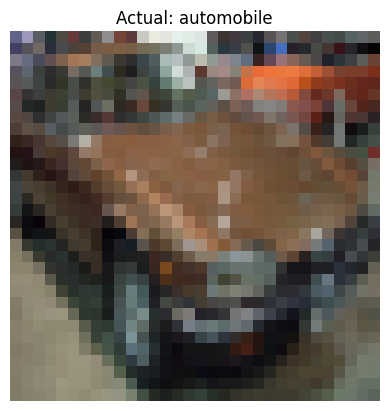

In [ ]:
# Change this to the index of the specific image you want to display
specific_index = 2000

# Display the specific image
plt.imshow(X_test[specific_index])
plt.title("Actual: %s" % category[np.argmax(y_test[specific_index])])
plt.axis("off")
plt.show()


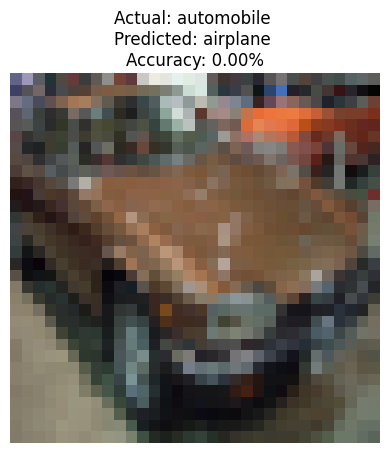

In [ ]:
from sklearn.metrics import accuracy_score
selected_image_index = 2000

# Make a prediction for the selected image
selected_true_label = np.argmax(y_test[selected_image_index])
selected_predicted_label = np.argmax(predLabel[selected_image_index])

# Check if the prediction is correct for the selected image
correct_prediction = selected_true_label == selected_predicted_label

# Calculate the accuracy for the selected image
accuracy = 1.0 if correct_prediction else 0.0

# Visualize the selected image and print its details
plt.imshow(X_test[selected_image_index])
plt.title("Actual: %s \nPredicted: %s \nAccuracy: %.2f%%" % (category[selected_true_label], category[selected_predicted_label], accuracy * 100))
plt.axis("off")
plt.show()


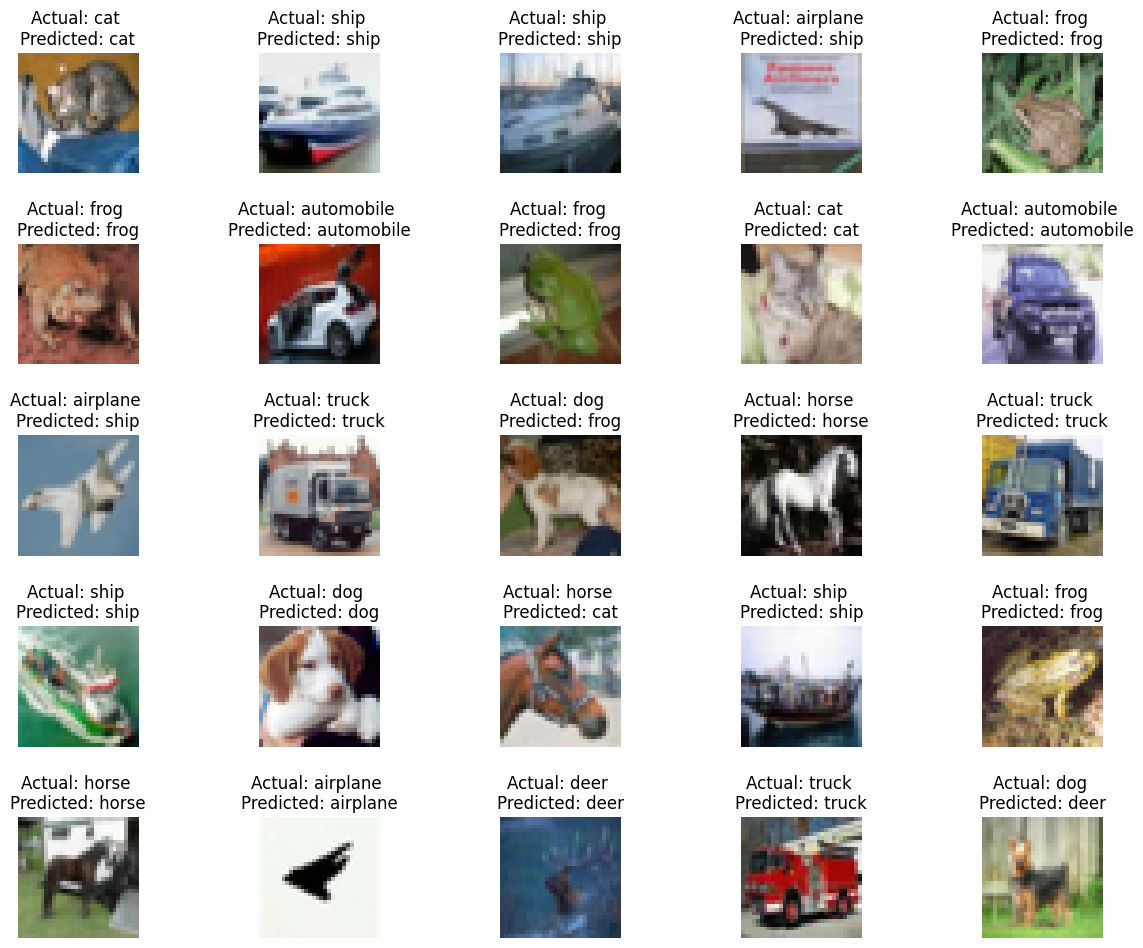

In [ ]:
#14
#Evaluating the model against test images to perform predictions.
fi, ax = plt.subplots(5, 5, figsize=(14,12))
ax = ax.ravel()

for fig in np.arange(0, 25):
  ax[ fig]. imshow(X_test[fig])
  ax[fig].set_title("Actual: %s \nPredicted: %s" % (category[np.argmax(y_test[fig])], category[predLabel[fig]]))
  ax[fig].axis ("off")
  plt.subplots_adjust(wspace=1)


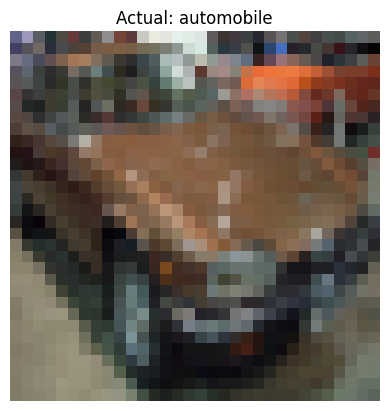

1/1 [==============================] - 0s 73ms/step
Predicted image category: frog


In [ ]:
specific_index = 2000

plt.imshow(X_test[specific_index])
plt.title("Actual: %s" % category[np.argmax(y_test[specific_index])])
plt.axis("off")
plt.show()

selected_image = np.expand_dims(X_test[specific_index], axis=0)
prediction = model3.predict(selected_image)
predicted_class_index = np.argmax(prediction)
print("Predicted image category:", category[predicted_class_index])
